In [182]:
#Import modules

import pandas as pd
import numpy as np
import re

In [3]:
df = pd.read_csv('input/GSAF5.csv', engine = 'python')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [8]:
pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 500)

In [4]:
#Read columns
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
#Column Activity
da = df.groupby('Activity')
da.first()

,Case Number,Date,Year,Type,Country,Area,Location,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Activity,,,,,,,,,,,,,,,,,,,,,
,1900.07.00,Late Jul-1900,1900,Provoked,USA,Connecticut,"Bridgeport, Fairfield County","skiff with Dr. William T. Healey, Dr. Henry Ca...",NaN,NaN,...,NaN,"Times, 8/1/1900",1900.07.00-Bridgeport.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1900.07.00,1900.07.00,672,NaN,NaN
,1993.01.04,04-Jan-93,1993,Boat,CARIBBEAN SEA,NaN,Off Dominican Republic,"canoe, occupants: Chris Newman & Stewart Newman",M,32 & 30,...,Two 3 m [10'] oceanic whitetip sharks,"A. MacCormick, p.100",1993.01.04-DominicanRepublic.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1993.01.04,1993.01.04,3708,NaN,NaN
a canoe was pursuing a schooner that had forcibily abducted 5 young girls,1892.03.25.R,Reported 25-Mar-1893,1892,Unprovoked,PACIFIC OCEAN,NaN,NaN,NaN,M,NaN,...,NaN,"West Australian, 3/25/1892",1892.03.25.R-Canoe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1892.03.25.R,1892.03.25.R,552,NaN,NaN
"""Boat accident""",1895.05.03,03-May-1895,1895,Unprovoked,NEW ZEALAND,South Island,Preservation Inlet,James Cromarty,M,NaN,...,NaN,"Otago Witness, 5/16/1895",1895.05.03-Cromarty.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1895.05.03,1895.05.03,596,NaN,NaN
"""Climbing up to ship after repairing the stern in water""",1958.09.13,13-Sep-58,1958,Unprovoked,ANDAMAN / NICOBAR ISLANDAS,NaN,NaN,Sailor of tuna vessel Daisan-Tenyo-Maru,M,32,...,Blue shark,M. Hosina,1958.09.13-sailor.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.09.13,1958.09.13,2079,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ship torpedoed 400 miles off the African coas. Man was clinging to hatch cover,1943.05.01.R,Reported 01-May-1943,1943,Sea Disaster,INDIAN OCEAN,NaN,NaN,Clarence Master,M,NaN,...,Blue shark,"St. Petersburg Times, 5/1/1943",1943.05.01.R-Clarence-Master.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1943.05.01.R,1943.05.01.R,1543,NaN,NaN
small boat,1893.10.16,16-Oct-1893,1893,Invalid,CROATIA,Primorje-Gorski Kotar County,"Off Volusca, Opatija",4 passengers frightened by shark,NaN,NaN,...,NaN,C. Moore,1893.10.16-Opatija.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1893.10.16,1893.10.16,572,NaN,NaN
wreck of the State Oil Company ship Permina,1966.01.25,25-Jan-66,1966,Sea Disaster,INDONESIA,North Sumatra,Near Belawan,NaN,NaN,NaN,...,NaN,Sydney Daily Telegraph,1966.01.25-Permina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1966.01.25,1966.01.25,2631,NaN,NaN


In [6]:
#Count a column
df.groupby(['Sex ']).count()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Sex,,,,,,,,,,,,,,,,,,,,,
.,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,0
F,585,585,585,585,582,567,560,536,580,426,...,323,582,585,585,584,585,585,585,0,0
M,4835,4835,4835,4835,4798,4507,4430,4509,4778,2841,...,2468,4824,4835,4834,4833,4835,4835,4835,1,2
M,2,2,2,2,2,2,2,2,2,1,...,1,2,2,2,2,2,2,2,0,0
N,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,0
lli,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [7]:
#Look for values in a column

db = df["Unnamed: 22"].value_counts()
db

stopped here    1
Name: Unnamed: 22, dtype: int64

In [8]:
#Look for not null
dc = df[(df["Unnamed: 22"].isnull() == False)]
dc

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,...,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN


In [9]:
de = df[(df["Species "].isnull() == False)]
de

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,...,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,2016.09.11,5987,NaN,NaN
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,...,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,2016.09.07,5986,NaN,NaN
12,2016.09.01,01-Sep-16,2016,Unprovoked,USA,California,"Refugio State Beach, Santa Barbara County",Spearfishing,Tyler McQuillen,M,...,White shark,"R. Collier, GSAF",2016.09.01-McQuillen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.01,2016.09.01,5981,NaN,NaN
13,2016.08.29.b,29-Aug-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Sam Cumiskey,M,...,"Bull shark, 6'","News Channel 8, 8/30/16",2016.08.29.b-Cumiskey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.08.29.b,2016.08.29.b,5980,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5966,ND.0026,Early 1930s,0,Unprovoked,BELIZE,NaN,NaN,Standing,a servant,M,...,12' tiger shark,Mitchell-Hedges,ND-0026-Belize.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0026,ND.0026,27,NaN,NaN
5983,ND.0009,Before 1906,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,...,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10,NaN,NaN
5984,ND.0008,Before 1906,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9,NaN,NaN
5985,ND.0007,Before 1906,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8,NaN,NaN


In [10]:
dg = df[df['Activity'] == 'Surfing']
dg

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,1922.01.04,04-Jan-22,1922,Unprovoked,AUSTRALIA,New South Wales,"Stockton Beach, Newcastle",Surfing,John Manning Rowe,M,...,NaN,"The Argus, 1/9/1922; V.M. Coppleson (1933), N15",1922.01.04-JManningRowe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1922.01.04,1922.01.04,989,NaN,NaN
5048,1918.03.22,22-Mar-18,1918,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Surfing,Arthur Cook,M,...,12' shark,"The Advertiser, 3/25/1918",1918.03.22-Cook.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1918.03.22,1918.03.22,945,NaN,NaN
5808,1828.00.00,1828,1828,Unprovoked,USA,Hawaii,"Uo, Lahaina, Maui",Surfing,Male,M,...,NaN,"J. Borg, p.68; L. Taylor (1993), pp.94-95",1828.00.00-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1828.00.00,1828.00.00,185,NaN,NaN
5837,1779.00.00,1779,1779,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,...,NaN,"G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...",1779.00.00-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1779.00.00,1779.00.00,156,NaN,NaN


In [11]:
dh = df.Country.value_counts()
dh

USA                       2116
AUSTRALIA                 1279
SOUTH AFRICA               565
PAPUA NEW GUINEA           133
NEW ZEALAND                125
                          ... 
CYPRUS                       1
BRITISH ISLES                1
ADMIRALTY ISLANDS            1
BRITISH WEST INDIES          1
BRITISH VIRGIN ISLANDS       1
Name: Country, Length: 203, dtype: int64

In [12]:
dj = dict(df['Activity'].value_counts())
dj

{'Surfing': 904,
 'Swimming': 819,
 'Fishing': 414,
 'Spearfishing': 321,
 'Bathing': 153,
 'Wading': 144,
 'Diving': 123,
 'Standing': 97,
 'Snorkeling': 77,
 'Scuba diving': 74,
 'Body boarding': 54,
 'Body surfing': 48,
 'Swimming ': 47,
 'Treading water': 32,
 'Pearl diving': 32,
 'Boogie boarding': 28,
 'Kayaking': 28,
 'Free diving': 26,
 'Fell overboard': 21,
 'Windsurfing': 18,
 'Boogie Boarding': 16,
 'Shark fishing': 15,
 'Walking': 15,
 'Surf-skiing': 12,
 'Canoeing': 12,
 'Rowing': 12,
 'Fishing ': 12,
 'Surf skiing': 12,
 'Floating': 12,
 'Fishing for sharks': 11,
 'Surf fishing': 11,
 'Freediving': 10,
 'Sponge diving': 10,
 'Kayak Fishing': 10,
 'Diving for trochus': 9,
 'Sailing': 9,
 'Sitting on surfboard': 9,
 'Fell into the water': 8,
 'Sea disaster': 8,
 'Skindiving': 7,
 'Paddle boarding': 7,
 'Playing': 7,
 'Free diving for abalone': 7,
 'Surfing (sitting on his board)': 7,
 'Boating': 7,
 'Spearfishing ': 7,
 'Diving for abalone': 7,
 'Floating on his back': 7,
 

In [13]:
di = df['Year'].value_counts()
di

2015    139
2011    128
2014    125
0       124
2013    122
       ... 
1742      1
1758      1
1818      1
1822      1
1595      1
Name: Year, Length: 232, dtype: int64

AttributeError: 'numpy.ndarray' object has no attribute 'agg'

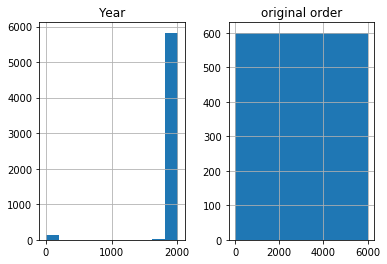

In [17]:
%matplotlib inline
dj = df.hist().agg({"Activity":"count"}).plot.bar()
dj

In [75]:
#Select only some columns from original dataframe
new_df = df[['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source']]
new_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


In [76]:
#Select null values

new_df.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
dtype: int64

In [33]:
#Accesing data by index 

#new_df.iloc[0] #First row
#new_df.iloc[0:5] #First five rows
#new_df.iloc[:,0] #First column
#new_df.iloc[:,0:5] #First five columns

,Case Number,Date,Year,Type,Country
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA
...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA
5989,ND.0003,1900-1905,0,Unprovoked,USA
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA


In [77]:
new_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


In [78]:
#Setting a column as index for using loc
new_df.set_index('Area', inplace = True)
new_df.head()

,Case Number,Date,Year,Type,Country,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Area,,,,,,,,,,,,,,,
Florida,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
Florida,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
Florida,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
Victoria,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
Victoria,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


In [90]:
#Using loc to look for data
new_df.loc['Florida'] #Look for Florida label
new_df.loc[['Florida', 'Victoria']] #Look for some labels
new_df.loc[['Malaga', 'Valencia'], 'Activity': 'Fatal (Y/N)'] #Look for some labels an all de columns between selected
new_df.loc['Malaga', ['Activity']] #Look for a column filtered labels

,Activity
Area,
Malaga,NaN
Malaga,Swimming


In [112]:
#Resetting index
new_df.reset_index()

,Area,Case Number,Date,Year,Type,Country,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,Florida,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,Florida,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,Florida,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
3,Victoria,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
4,Victoria,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,Western Australia,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
5988,Western Australia,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
5989,North Carolina,ND.0003,1900-1905,0,Unprovoked,USA,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
5990,NaN,ND.0002,1883-1889,0,Unprovoked,PANAMA,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [138]:
#Using loc with booleans
#new_df.set_index('Country')
#new_df.loc[new_df['Activity'] == 'Surfing'] #Looking for 
#new_df.loc[new_df['Activity'] == 'Surfing', ['Country', 'Age', 'Sex']]


#new_df.set_index('Sex ')
new_df.loc[(new_df['Year'] > 2000) & (new_df['Activity'] == 'Surfing')]

,Case Number,Date,Year,Type,Country,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Area,,,,,,,,,,,,,,,
Florida,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
Florida,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
Florida,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
Victoria,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
Victoria,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eastern Cape Province,2001.04.08.b,08-Apr-01,2001,Unprovoked,SOUTH AFRICA,Cape St. Francis,Surfing,Dunstan Hogan,M,46,"Thigh, hip & buttock bitten",N,09h30,"White shark, 2.7 m [9']","M. Smale, P.E. Museum"
New South Wales,2001.04.02.a,02-Apr-01,2001,Unprovoked,AUSTRALIA,Nambucca River Entrance,Surfing,Richard Ellis,M,40,Calf bitten,N,10h00,Bronze whaler shark,"T. Peake, GSAF"
Florida,2001.03.09,09-Mar-01,2001,Unprovoked,USA,"Coral Cove Park, Jupiter Island, Martin County",Surfing,Chad Hooker,M,NaN,Fingers & hand lacerated,N,NaN,"Spinner shark, 1.2 m to 1.5 m [4' to 5']",Shark Survivor. Inc.


In [117]:
#Using a uniquely valued identifying field of the data as its index
new_df['Case Number'].is_unique

False

In [139]:
new_df.get_dtype_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


object    14
int64      1
dtype: int64

In [141]:
new_df.Date.value_counts()

1957         11
1942          9
1956          8
1950          7
1941          7
             ..
11-Mar-27     1
25-Nov-08     1
17-Sep-03     1
Dec-1826      1
08-Nov-11     1
Name: Date, Length: 5128, dtype: int64

In [143]:
nuevo = df[df['Country'] == 'USA']
nuevo.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,...,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,2016.09.11,5987,NaN,NaN
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,...,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,2016.09.07,5986,NaN,NaN


In [160]:
new_df.head()

,Case Number,Date,Year,Type,Country,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Area,,,,,,,,,,,,,,,
Florida,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
Florida,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
Florida,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
Victoria,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
Victoria,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


In [170]:
new_df[new_df['Year'] > 1950]


,Case Number,Date,Year,Type,Country,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Area,,,,,,,,,,,,,,,
Florida,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
Florida,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
Florida,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
Victoria,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
Victoria,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New South Wales,1951.02.03,03-Feb-51,1951,Unprovoked,AUSTRALIA,"Windang, near the entrance to Lake Illawarra",Spearfishing (but treading water on the surface),Albert Pride,M,20,Shark's fin caused abrasion on his chest,N,NaN,NaN,"G.P. Whitley (1951), p.194 cites Sunday Sun (S..."
New South Wales,1951.02.01,01-Feb-51,1951,Unprovoked,AUSTRALIA,Bondi Beach,Swimming,Harry Sheen,M,14,Leg bitten,N,NaN,1.2 m [4'] shark,"G.P. Whitley (1951), p.194 cites Daily Mirror ..."
KwaZulu-Natal,1951.01.21,21-Jan-51,1951,Unprovoked,SOUTH AFRICA,"Native Beach, Durban",Swimming,Hendrie Nkwazi,M,19,"FATAL, right thigh bitten, leg severed at knee",Y,16h25,NaN,"D. Davies; M. Levine, GSAF"


In [169]:
new_df.min()

Case Number             0.0214
Date               10-Jan-2009
Year                         0
Type                      Boat
dtype: object

In [173]:
new_df.Year.min()

0

In [177]:
new_df.Year.isnull().sum()

0

In [179]:
#Valores nulos
new_df.isnull().any() #True si tiene valores nulos
#new_df.isnull().sum() #Cuántos nulos tiene cada columna

Case Number               False
Date                      False
Year                      False
Type                      False
Country                    True
Location                   True
Activity                   True
Name                       True
Sex                        True
Age                        True
Injury                     True
Fatal (Y/N)                True
Time                       True
Species                    True
Investigator or Source     True
dtype: bool

In [187]:
#Revisar si los dos últimos dígitos de Date coinciden con los dos últimos dígitos de Year

def compare_years(value):
    if (r'$\d{2}, new_df.Date) == (r'$\d{2}, new_df.Year)
    return True

compare_years(new_df.Year.iloc[200])

SyntaxError: invalid syntax (<ipython-input-187-aa0371c2f084>, line 4)

In [194]:
new_df.head()

,Case Number,Date,Year,Type,Country,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Area,,,,,,,,,,,,,,,
Florida,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
Florida,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
Florida,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
Victoria,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
Victoria,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


In [198]:
#duplicados

df[df['Case Number'].duplicated(keep=False)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
300,2014.08.02,02-Aug-14,2014,Unprovoked,USA,Florida,"South of Cocoa Beach, Brevard County",Surfing,male,M,...,NaN,"Florida Today, 8/8/2014",2014.08.08-CocoaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.02,2014.08.02,5692,NaN,NaN
301,2014.08.02,02-Aug-14,2014,Unprovoked,USA,Florida,"Table Beach, Brevard County",Boogie boarding,Christian Sanhueza,M,...,NaN,"Florida Today, 8/2/2014",2014.08.02-Sanhueza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.02,2014.08.02,5691,NaN,NaN
392,2013.10.05,06-Oct-13,2013,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Jay Scrivner,M,...,"White shark, 8' to 10'","R. Collier, GSAF",2013.10.06-Scrivner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.10.05,2013.10.05,5601,NaN,NaN
393,2013.10.05,10-Oct-13,2013,Unprovoked,USA,Florida,"Destin, Okaloosa County",Wading,Zachary Tyke Standridge,M,...,Small bull shark,"Monroe County Advocate, 10/9/2013",2013.10.05-Standridge.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.10.05,2013.10.05,5600,NaN,NaN
523,2012.09.02.b,02-Sep-12,2012,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Boogie boarding,female,F,...,3.5' to 4' shark,"WYTV, 9/3/2012",2012.09.02.b-NSB-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.09.02.b,2012.09.02.b,5470,NaN,NaN
524,2012.09.02.b,02-Sep-12,2012,Provoked,USA,Hawaii,"Spreckelsville, Maui",Spearfishing,M. Malabon,NaN,...,"Tiger shark, 10' to 12'",HawaiiNow.com,2012.09.02.c-Malabon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.09.02.b,2012.09.02.b,5469,NaN,NaN
840,2009.12.18,18-Dec-09,2009,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. Johns",Paddling on kneeboard,Tshintshekile Nduva,M,...,NaN,"B. Jordan & A. Ferreira, Times Live, 12/21/2009",2009.12.18.a-Nduva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.12.18,2009.12.18,5153,NaN,NaN
841,2009.12.18,18-Dec-09,2009,Invalid,SOUTH AFRICA,KwaZulu-Natal,"North Beach, Durban",Surfing,Lance Morris,M,...,No shark involvement,"M. Addison, C. Eckstander, GSAF",2009.12.18.b-Morris-barracuda bite.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.12.18,2009.12.18,5152,NaN,NaN
1212,2006.09.02,02-Sep-06,2006,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,male,M,...,NaN,"S. Petersohn, GSAF",2006.09.02.b-Child-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.09.02,2006.09.02,4781,NaN,NaN
1213,2006.09.02,02-Sep-06,2006,Unprovoked,SOUTH AFRICA,Western Cape Province,Noordhoek,Surfing,Steven Harcourt-Wood,M,...,"White shark, 3.5m","Cape Times, 9/3/2006",2006.09.02.a-Harcourt-Wood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.09.02,2006.09.02,4780,NaN,NaN


In [203]:
df[df['Case Number'].duplicated(keep=False)].count()

Case Number               32
Date                      32
Year                      32
Type                      32
Country                   32
Area                      29
Location                  32
Activity                  27
Name                      30
Sex                       31
Age                       15
Injury                    32
Fatal (Y/N)               32
Time                      11
Species                   15
Investigator or Source    32
pdf                       32
href formula              32
href                      32
Case Number.1             32
Case Number.2             32
original order            32
Unnamed: 22                0
Unnamed: 23                0
dtype: int64